# Lab 2
## Authors
- Francisco Roh
- Bryan Calisto

## Sentiment analysis with Naive Bayes
### Instructions

Work in groups of 2 people
Submission should be done using a GitHub url

Dataset
https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data

### Notes:

The data provides 5 labels: negative, somewhat negative, neutral, somewhat neutral and positive.

Use the train set for training and evaluating your models.

### Activities:
1) Do a quick EDA that highlights some of the common texts used for each type of review

2) Tokenize all the movie review texts

3) Create a numerical feature vector for each document (Bag of words)

4) Define the probability model for each of the 5 classes

5) Train and evaluate the model

6) Make adjustments to your BoW:

    - remove stop words
    - case folding
    - stemming
    - lemmatization
    - instead of using a 0/1 (binary) vector, use the number of times that a word occurs in the text
7) How does these techniques affect your models?

In [90]:
import pandas as pd

# Cargar el archivo .tsv
df = pd.read_csv('train.tsv', sep='\t')

# Mostrar la forma y primeras filas del DataFrame
print(df.shape)
df.head()


(156060, 4)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


### 1) Do a quick EDA that highlights some of the common texts used for each type of review

Iniciamos el EDA utilizando el dataset original:

In [91]:
df.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


### Etiquetado para análisis

In [92]:
sentiment_labels = {
    0: '0 negativo     ',
    1: '1 algo negativo',
    2: '2 neutral      ',
    3: '3 algo positivo',
    4: '4 positivo     '
}

sentiment_labels2 = {
    0: '0 negativo',
    1: '1 algo negativo',
    2: '2 neutral',
    3: '3 algo positivo',
    4: '4 positivo'
}

# Añadir una columna con las etiquetas descriptivas
df['Sentiment_Label'] = df['Sentiment'].map(sentiment_labels)
# Añadir una columna con las etiquetas descriptivas
df['Sentiment_label'] = df['Sentiment'].map(sentiment_labels2)


### Distribución de Sentimientos

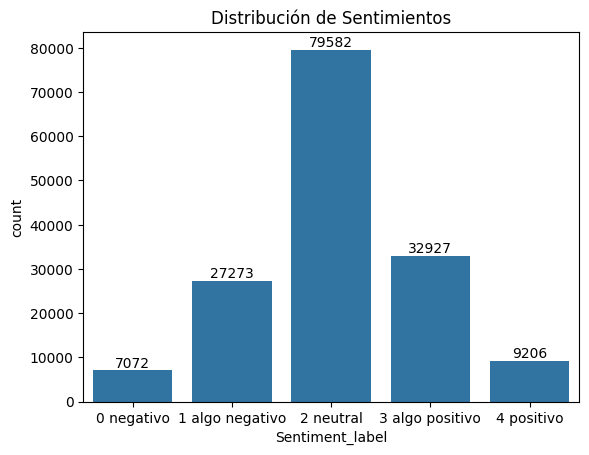

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de barras
ax = sns.countplot(x='Sentiment_label', data=df, order=['0 negativo', '1 algo negativo', '2 neutral', '3 algo positivo', '4 positivo'])

# Añadir etiquetas de los valores sobre cada barra usando `ax.bar_label`
ax.bar_label(ax.containers[0], label_type='edge')

plt.title('Distribución de Sentimientos')
plt.show()




La cantidad de comentarios neutros es la clase preponderante, generando desbalance en el dataset

### Análisis de Palabras Comunes por sentimiento

Sin realizar preprocesamiento en el dataset se generan los siguientes resultados:

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Ordenar los sentimientos de acuerdo a las claves del diccionario sentiment_labels
ordered_sentiments = sorted(df['Sentiment_Label'].unique(), key=lambda x: list(sentiment_labels.keys())[list(sentiment_labels.values()).index(x)])

# Definir el vectorizador para contar las palabras
vectorizer = CountVectorizer(max_features=20)  # Limitar a las 10 palabras más comunes
common_words = {}

# Filtrar y vectorizar por cada sentimiento
for sentiment in ordered_sentiments:
    phrases = df[df['Sentiment_Label'] == sentiment]['Phrase']
    X = vectorizer.fit_transform(phrases)

    # Sumar las ocurrencias de cada palabra
    word_counts = np.sum(X.toarray(), axis=0)

    # Crear un diccionario de palabras y sus conteos
    words_with_counts = dict(zip(vectorizer.get_feature_names_out(), word_counts))

    # Ordenar las palabras por frecuencia en orden descendente
    words_with_counts = dict(sorted(words_with_counts.items(), key=lambda item: item[1], reverse=True))

    common_words[sentiment] = words_with_counts

# Mostrar palabras comunes y sus cantidades en una sola línea para cada sentimiento
for sentiment, words in common_words.items():
    print(f"Sent. {sentiment}: ", end='')
    print(", ".join([f"{word}: {count}" for word, count in words.items()]))


Sent. 0 negativo     : the: 3462, and: 2549, of: 2277, to: 1916, is: 1372, that: 1139, it: 1086, in: 1038, movie: 793, as: 757, this: 652, for: 545, its: 492, film: 480, an: 467, with: 452, bad: 450, you: 437, so: 398, or: 387
Sent. 1 algo negativo: the: 10885, of: 6660, and: 6204, to: 5571, is: 3362, it: 3067, that: 2982, in: 2965, as: 2184, for: 1739, its: 1631, with: 1533, movie: 1463, an: 1304, but: 1303, film: 1281, be: 1278, this: 1244, not: 1175, too: 1146
Sent. 2 neutral      : the: 20619, of: 12287, and: 10241, to: 8295, in: 5562, it: 3791, is: 3703, that: 3677, as: 2941, for: 2939, its: 2536, with: 2471, film: 2175, movie: 2054, on: 2041, this: 1950, be: 1929, an: 1924, but: 1877, you: 1750
Sent. 3 algo positivo: the: 12459, and: 9180, of: 8405, to: 5411, is: 3489, in: 3365, that: 3280, it: 2927, with: 2365, an: 2061, as: 2037, its: 1870, film: 1848, for: 1763, but: 1434, movie: 1344, you: 1312, this: 1293, be: 1166, on: 1067
Sent. 4 positivo     : the: 4208, and: 4003, of: 3

### Nube de palabras

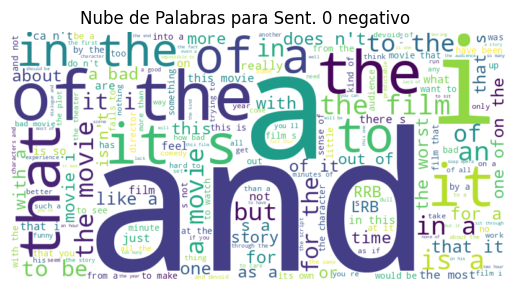

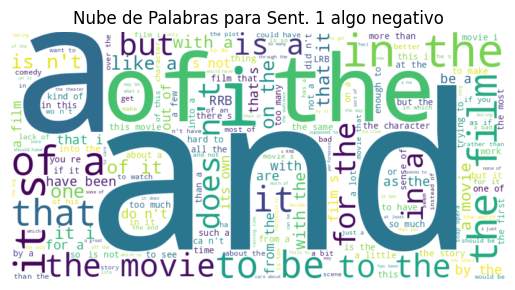

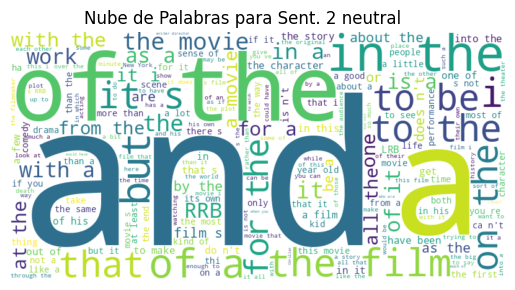

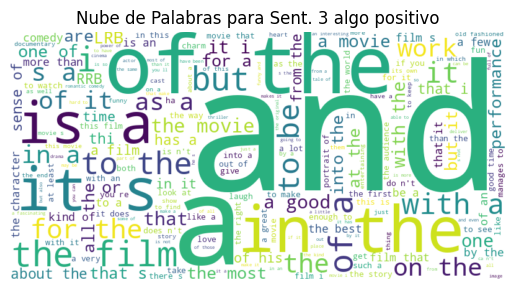

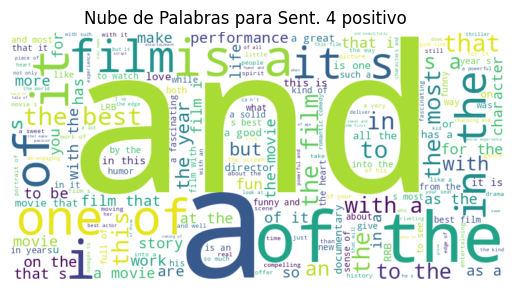

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ordenar los sentimientos de acuerdo a las claves del diccionario sentiment_labels
ordered_sentiments = sorted(df['Sentiment_Label'].unique(), key=lambda x: list(sentiment_labels.keys())[list(sentiment_labels.values()).index(x)])

# Generar nubes de palabras para cada sentimiento en orden
for sentiment in ordered_sentiments:
    text = ' '.join(df[df['Sentiment_Label'] == sentiment]['Phrase'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set()).generate(text)

    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras para Sent. {sentiment}')
    plt.show()


Es evidente que se requiere para el ejercicio inicial (antes de realizar el punto 6 con el preprocesamiento completo solicitado) al menos retirar las STOPWORDS con palabras en minúsculas para generar un análisis adecuado:

In [96]:
import nltk
from nltk.corpus import stopwords

# Descargar el conjunto de stopwords en inglés de nltk (si no lo has hecho antes)
nltk.download('stopwords')

# Obtener el conjunto de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para eliminar stopwords de una frase
def remove_stopwords(text):
    words = text.split()
    cleaned_text = ' '.join([word for word in words if word.lower() not in stop_words])
    return cleaned_text

# Aplicar la función a la columna 'Phrase' de tu DataFrame
df['EDA_Phrase_Cleaned'] = df['Phrase'].apply(remove_stopwords)

df[['Phrase', 'EDA_Phrase_Cleaned']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Phrase,EDA_Phrase_Cleaned
0,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .","series escapades demonstrating adage good goose also good gander , occasionally amuses none amounts much story ."
1,A series of escapades demonstrating the adage that what is good for the goose,series escapades demonstrating adage good goose
2,A series,series
3,A,
4,series,series


### Análisis de Palabras Comunes por sentimiento

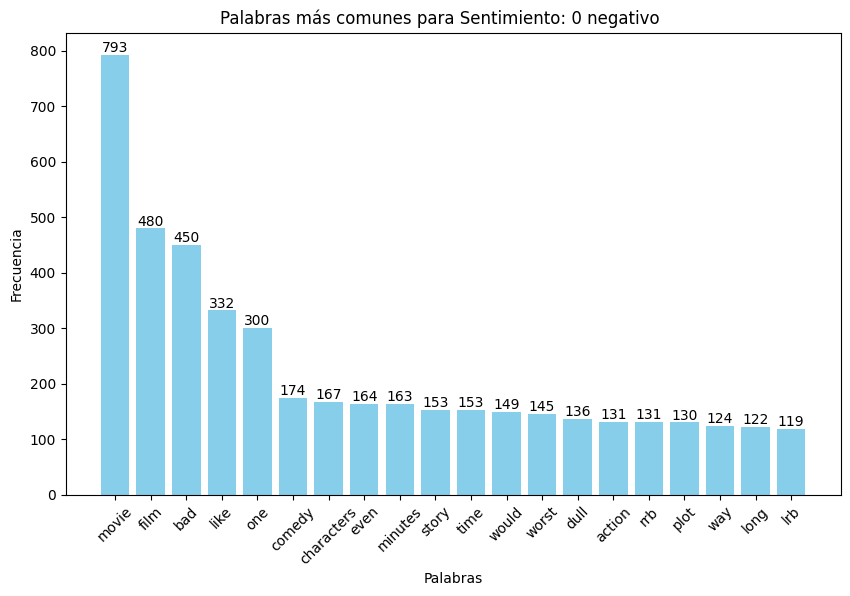

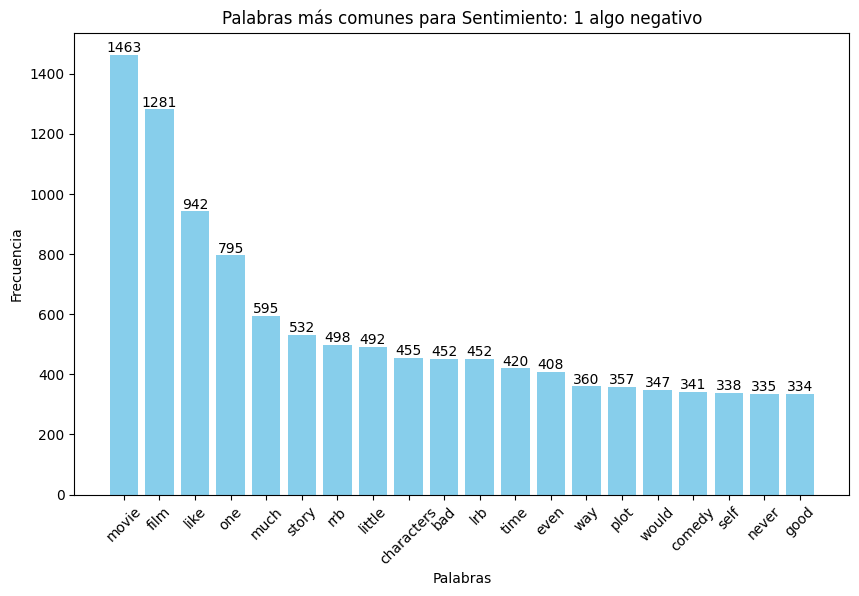

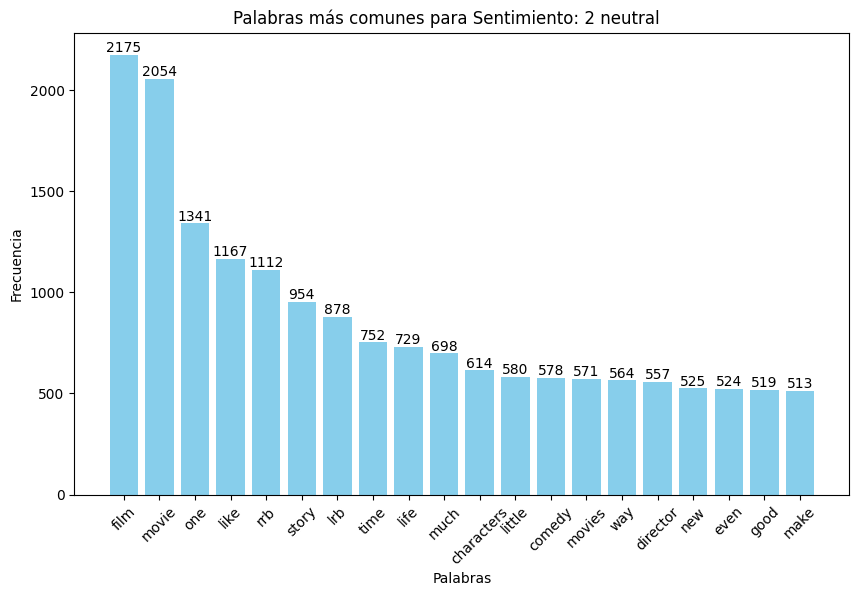

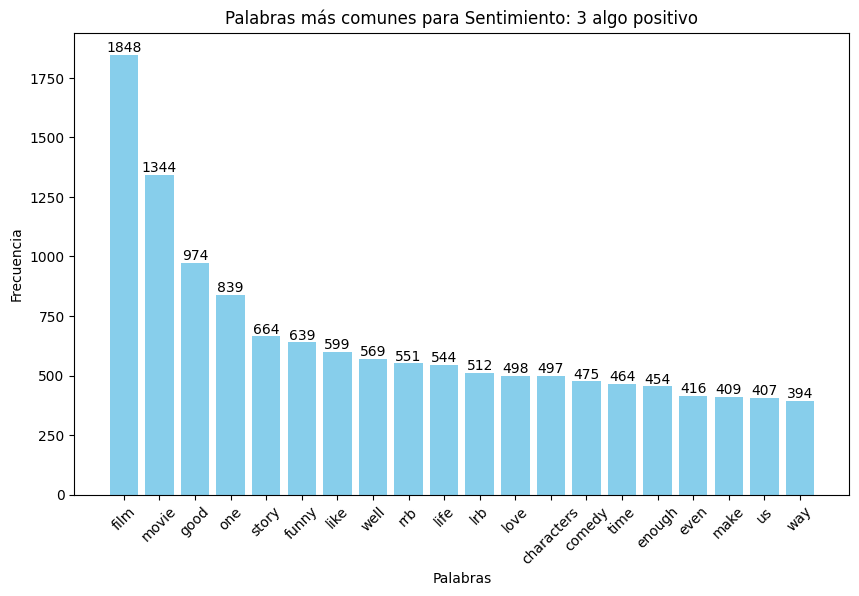

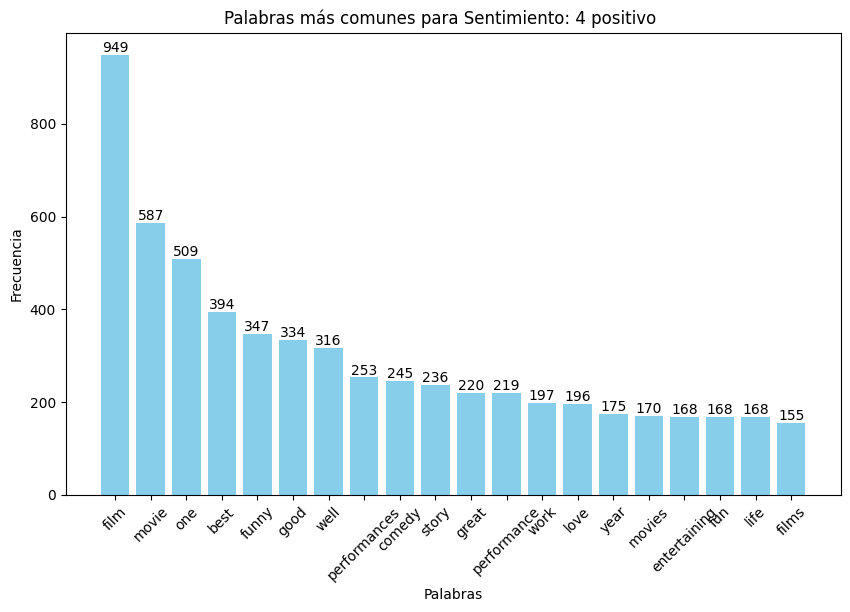

Sent. 0 negativo     : movie: 793, film: 480, bad: 450, like: 332, one: 300, comedy: 174, characters: 167, even: 164, minutes: 163, story: 153, time: 153, would: 149, worst: 145, dull: 136, action: 131, rrb: 131, plot: 130, way: 124, long: 122, lrb: 119
Sent. 1 algo negativo: movie: 1463, film: 1281, like: 942, one: 795, much: 595, story: 532, rrb: 498, little: 492, characters: 455, bad: 452, lrb: 452, time: 420, even: 408, way: 360, plot: 357, would: 347, comedy: 341, self: 338, never: 335, good: 334
Sent. 2 neutral      : film: 2175, movie: 2054, one: 1341, like: 1167, rrb: 1112, story: 954, lrb: 878, time: 752, life: 729, much: 698, characters: 614, little: 580, comedy: 578, movies: 571, way: 564, director: 557, new: 525, even: 524, good: 519, make: 513
Sent. 3 algo positivo: film: 1848, movie: 1344, good: 974, one: 839, story: 664, funny: 639, like: 599, well: 569, rrb: 551, life: 544, lrb: 512, love: 498, characters: 497, comedy: 475, time: 464, enough: 454, even: 416, make: 409, 

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

# Ordenar los sentimientos de acuerdo a las claves del diccionario sentiment_labels
ordered_sentiments = sorted(df['Sentiment_Label'].unique(), key=lambda x: list(sentiment_labels.keys())[list(sentiment_labels.values()).index(x)])

# Definir el vectorizador para contar las palabras
vectorizer = CountVectorizer(max_features=20)  # Limitar a las 20 palabras más comunes
common_words = {}

# Filtrar y vectorizar por cada sentimiento
for sentiment in ordered_sentiments:
    phrases = df[df['Sentiment_Label'] == sentiment]['EDA_Phrase_Cleaned']
    X = vectorizer.fit_transform(phrases)

    # Sumar las ocurrencias de cada palabra
    word_counts = np.sum(X.toarray(), axis=0)

    # Crear un diccionario de palabras y sus conteos
    words_with_counts = dict(zip(vectorizer.get_feature_names_out(), word_counts))

    # Ordenar las palabras por frecuencia en orden descendente
    words_with_counts = dict(sorted(words_with_counts.items(), key=lambda item: item[1], reverse=True))

    common_words[sentiment] = words_with_counts

    # Generar el gráfico de barras para las palabras más comunes
    plt.figure(figsize=(10, 6))
    plt.bar(words_with_counts.keys(), words_with_counts.values(), color='skyblue')
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.title(f'Palabras más comunes para Sentimiento: {sentiment}')

    # Añadir etiquetas encima de las barras
    for word, count in words_with_counts.items():
        plt.text(word, count, str(count), ha='center', va='bottom')

    plt.xticks(rotation=45)
    plt.show()

# Mostrar palabras comunes y sus cantidades en una sola línea para cada sentimiento
for sentiment, words in common_words.items():
    print(f"Sent. {sentiment}: ", end='')
    print(", ".join([f"{word}: {count}" for word, count in words.items()]))


### Nube de palabras

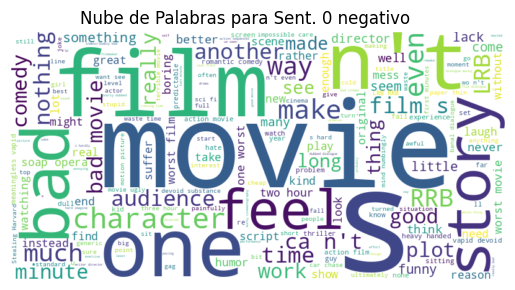

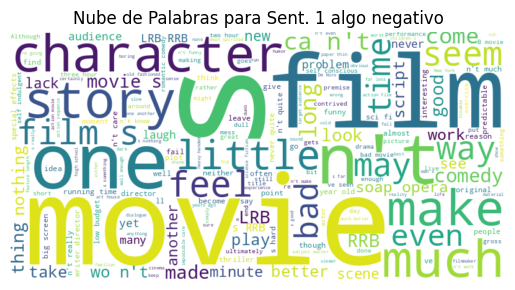

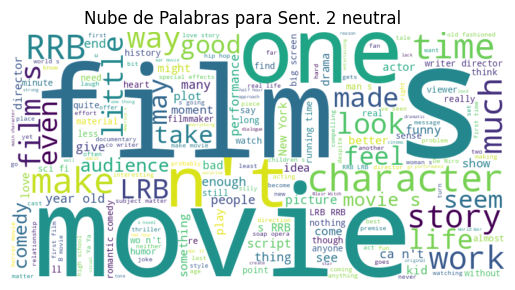

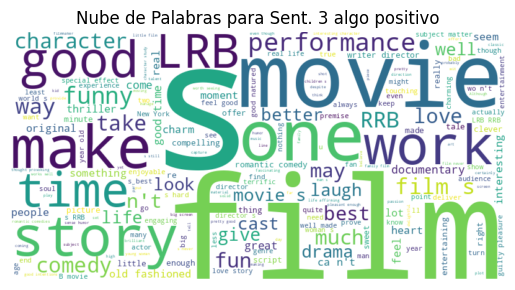

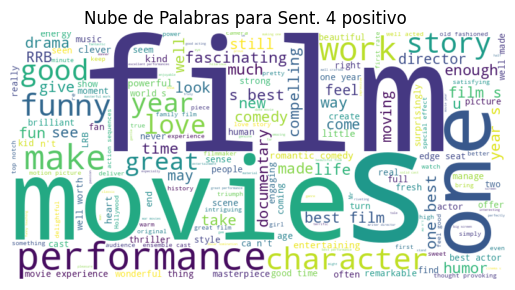

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ordenar los sentimientos de acuerdo a las claves del diccionario sentiment_labels
ordered_sentiments = sorted(df['Sentiment_Label'].unique(), key=lambda x: list(sentiment_labels.keys())[list(sentiment_labels.values()).index(x)])

# Generar nubes de palabras para cada sentimiento en orden
for sentiment in ordered_sentiments:
    text = ' '.join(df[df['Sentiment_Label'] == sentiment]['EDA_Phrase_Cleaned'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras para Sent. {sentiment}')
    plt.show()


De este análisis exploratorio inicial se observa que las principales palabras de cada tipo de sentimiento son bastante similares y pocas, de baja frecuencia, se caracterizan en cada grupo. Por las características de los textos no se utilizan n-gramas.

### 2) Tokenize all the movie review texts



In [99]:
import spacy

# Cargar el modelo de idioma en inglés
nlp = spacy.load('en_core_web_sm')

# Función para tokenizar usando spaCy
def tokenize_phrase_spacy(phrase):
    doc = nlp(phrase)
    return [token.text for token in doc]

# Aplicar la tokenización a la columna 'Phrase' del DataFrame
df['Phrase_Tokens'] = df['Phrase'].apply(tokenize_phrase_spacy)

# Mostrar las primeras filas para verificar
df[['Phrase', 'Phrase_Tokens']].head()


,Phrase,Phrase_Tokens
0,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .","[A, series, of, escapades, demonstrating, the, adage, that, what, is, good, for, the, goose, is, also, good, for, the, gander, ,, some, of, which, occasionally, amuses, but, none, of, which, amounts, to, much, of, a, story, .]"
1,A series of escapades demonstrating the adage that what is good for the goose,"[A, series, of, escapades, demonstrating, the, adage, that, what, is, good, for, the, goose]"
2,A series,"[A, series]"
3,A,[A]
4,series,[series]


### 3) Create a numerical feature vector for each document (Bag of words)



In [100]:
from sklearn.feature_extraction.text import CountVectorizer

# Crear el vectorizador con binary=True
vectorizer = CountVectorizer(binary=True)

# Ajustar el vectorizador a las frases y transformarlas en vectores
X = vectorizer.fit_transform(df['Phrase'])

# Convertir la matriz a un DataFrame para una visualización más sencilla
df_bow_binary = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Mostrar las primeras filas del DataFrame resultante
df_bow_binary.head()

,000,10,100,101,102,103,104,105,10th,11,...,ziyi,zoe,zombie,zone,zoning,zoolander,zoom,zucker,zwick,zzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4) Define the probability model for each of the 5 classes
### 5) Train and evaluate the model


Utilizaremos el modelo MultinomiaNB (Multinomial Naive Bayes)

                 precision    recall  f1-score   support

     0 Negativo       0.43      0.29      0.34      1414
1 Algo negativo       0.49      0.43      0.46      5455
      2 Neutral       0.69      0.78      0.73     15917
3 Algo positivo       0.52      0.51      0.51      6585
     4 Positivo       0.47      0.32      0.39      1841

       accuracy                           0.61     31212
      macro avg       0.52      0.47      0.49     31212
   weighted avg       0.60      0.61      0.60     31212



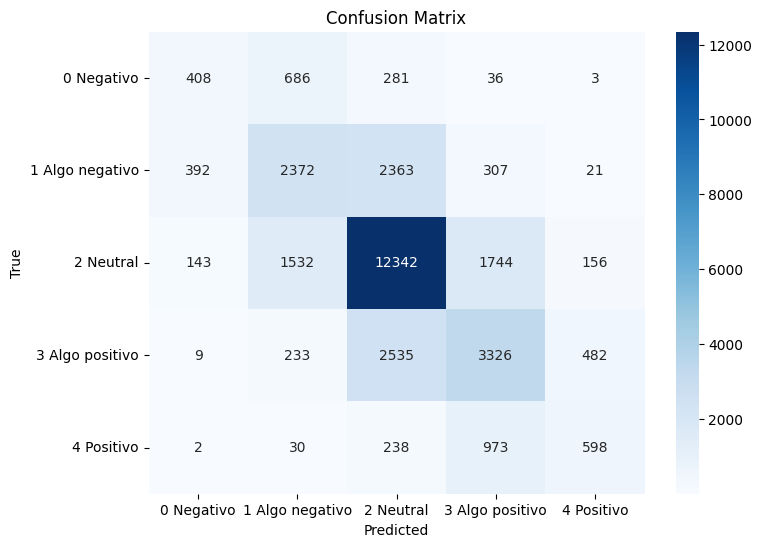

Accuracy: 0.6102140202486224
Precision: 0.5970851069548073
Recall: 0.6102140202486224
F1-Score: 0.6007873011029297


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

resultados=[]

def train_and_evaluate_model(tipo_data, X, y, average='weighted'):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    # Crear el modelo de Naive Bayes
    model = MultinomialNB()

    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)

    # Predecir las clases en el conjunto de prueba
    y_pred = model.predict(X_test)


    # Mostrar el informe de clasificación
    cr = classification_report(y_test, y_pred, target_names=['0 Negativo', '1 Algo negativo', '2 Neutral', '3 Algo positivo', '4 Positivo'])
    print(cr)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Definir las etiquetas de las clases
    class_names = ['0 Negativo', '1 Algo negativo', '2 Neutral', '3 Algo positivo', '4 Positivo']

    # Crear el mapa de calor de la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=average)
    recall = recall_score(y_test, y_pred, average=average)
    f1 = f1_score(y_test, y_pred, average=average)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

    metricas = {
        'Data': tipo_data,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Classification Report': cr,
        'Matriz de Confusión': cm,
        'Train Registros': len(y_train),
        'Test Registros': len(y_test)
    }

    return metricas

metricas = train_and_evaluate_model('Original', df_bow_binary, df['Sentiment'])
resultados.append(metricas)

### 6) Make adjustments to your BoW:

    - remove stop words
    - case folding
    - stemming
    - lemmatization
    - instead of using a 0/1 (binary) vector, use the number of times that a word occurs in the text


De lo revisado, el **stemming** corta los sufijos y prefijos de las palabras para reducirlas a su raíz, sin considerar si la raíz resultante es una palabra real o no. (Es una técnica más rudimentaria y menos precisa).

"running" → "run", "better" → "bett".

La **lemmatization**, utiliza un enfoque más avanzado que considera el contexto gramatical de la palabra, devolviendo el "lema" o la forma base de la palabra que existe en el vocabulario.

"running" → "run", "better" → "good".

No son alternativas complementarias ya que por su naturaleza la una podría confundir a la otra, sin considerar el procesamiento adicional.

Se compara el escenario base con los posibles escenarios con el preprocesamiento indicado para verificar cual es la mejor opción.

Paquetes y librerías

In [102]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Descargar recursos necesarios de nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Case folding

In [103]:
df['lower_text'] = df['Phrase'].str.lower()
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,Sentiment_Label,Sentiment_label,EDA_Phrase_Cleaned,Phrase_Tokens,lower_text
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,1 algo negativo,1 algo negativo,"series escapades demonstrating adage good goose also good gander , occasionally amuses none amounts much story .","[A, series, of, escapades, demonstrating, the, adage, that, what, is, good, for, the, goose, is, also, good, for, the, gander, ,, some, of, which, occasionally, amuses, but, none, of, which, amounts, to, much, of, a, story, .]","a series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story ."
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,2 neutral,2 neutral,series escapades demonstrating adage good goose,"[A, series, of, escapades, demonstrating, the, adage, that, what, is, good, for, the, goose]",a series of escapades demonstrating the adage that what is good for the goose
2,3,1,A series,2,2 neutral,2 neutral,series,"[A, series]",a series
3,4,1,A,2,2 neutral,2 neutral,,[A],a
4,5,1,series,2,2 neutral,2 neutral,series,[series],series


#### Remove stop words

In [104]:
No_Stopwords = df.copy()

No_Stopwords['Phrase_No_Stopwords'] = No_Stopwords['lower_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('english'))]))

No_Stopwords = No_Stopwords[~No_Stopwords['Phrase_No_Stopwords'].str.fullmatch(r'\s*')]
No_Stopwords = No_Stopwords.drop_duplicates(subset=['Phrase_No_Stopwords', 'Sentiment'])
No_Stopwords = No_Stopwords.dropna(subset=['Phrase_No_Stopwords'])

No_Stopwords.head()

,PhraseId,SentenceId,Phrase,Sentiment,Sentiment_Label,Sentiment_label,EDA_Phrase_Cleaned,Phrase_Tokens,lower_text,Phrase_No_Stopwords
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,1 algo negativo,1 algo negativo,"series escapades demonstrating adage good goose also good gander , occasionally amuses none amounts much story .","[A, series, of, escapades, demonstrating, the, adage, that, what, is, good, for, the, goose, is, also, good, for, the, gander, ,, some, of, which, occasionally, amuses, but, none, of, which, amounts, to, much, of, a, story, .]","a series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .","series escapades demonstrating adage good goose also good gander , occasionally amuses none amounts much story ."
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,2 neutral,2 neutral,series escapades demonstrating adage good goose,"[A, series, of, escapades, demonstrating, the, adage, that, what, is, good, for, the, goose]",a series of escapades demonstrating the adage that what is good for the goose,series escapades demonstrating adage good goose
2,3,1,A series,2,2 neutral,2 neutral,series,"[A, series]",a series,series
5,6,1,of escapades demonstrating the adage that what is good for the goose,2,2 neutral,2 neutral,escapades demonstrating adage good goose,"[of, escapades, demonstrating, the, adage, that, what, is, good, for, the, goose]",of escapades demonstrating the adage that what is good for the goose,escapades demonstrating adage good goose
8,9,1,escapades,2,2 neutral,2 neutral,escapades,[escapades],escapades,escapades


#### Stemming

In [105]:
df['Phrase_Stemmed'] = df['Phrase'].apply(lambda x: ' '.join([PorterStemmer().stem(word) for word in x.split()]))
No_Stopwords['Phrase_Stemmed'] = No_Stopwords['Phrase_No_Stopwords'].apply(lambda x: ' '.join([PorterStemmer().stem(word) for word in x.split()]))
No_Stopwords.head()

,PhraseId,SentenceId,Phrase,Sentiment,Sentiment_Label,Sentiment_label,EDA_Phrase_Cleaned,Phrase_Tokens,lower_text,Phrase_No_Stopwords,Phrase_Stemmed
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,1 algo negativo,1 algo negativo,"series escapades demonstrating adage good goose also good gander , occasionally amuses none amounts much story .","[A, series, of, escapades, demonstrating, the, adage, that, what, is, good, for, the, goose, is, also, good, for, the, gander, ,, some, of, which, occasionally, amuses, but, none, of, which, amounts, to, much, of, a, story, .]","a series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .","series escapades demonstrating adage good goose also good gander , occasionally amuses none amounts much story .","seri escapad demonstr adag good goos also good gander , occasion amus none amount much stori ."
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,2 neutral,2 neutral,series escapades demonstrating adage good goose,"[A, series, of, escapades, demonstrating, the, adage, that, what, is, good, for, the, goose]",a series of escapades demonstrating the adage that what is good for the goose,series escapades demonstrating adage good goose,seri escapad demonstr adag good goos
2,3,1,A series,2,2 neutral,2 neutral,series,"[A, series]",a series,series,seri
5,6,1,of escapades demonstrating the adage that what is good for the goose,2,2 neutral,2 neutral,escapades demonstrating adage good goose,"[of, escapades, demonstrating, the, adage, that, what, is, good, for, the, goose]",of escapades demonstrating the adage that what is good for the goose,escapades demonstrating adage good goose,escapad demonstr adag good goos
8,9,1,escapades,2,2 neutral,2 neutral,escapades,[escapades],escapades,escapades,escapad


#### Lemmatization

In [106]:
df['Phrase_Lemmatized'] = df['Phrase'].apply(lambda x: ' '.join([WordNetLemmatizer().lemmatize(word) for word in x.split()]))
No_Stopwords['Phrase_Lemmatized'] = No_Stopwords['Phrase_No_Stopwords'].apply(lambda x: ' '.join([WordNetLemmatizer().lemmatize(word) for word in x.split()]))
No_Stopwords.head()

,PhraseId,SentenceId,Phrase,Sentiment,Sentiment_Label,Sentiment_label,EDA_Phrase_Cleaned,Phrase_Tokens,lower_text,Phrase_No_Stopwords,Phrase_Stemmed,Phrase_Lemmatized
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,1 algo negativo,1 algo negativo,"series escapades demonstrating adage good goose also good gander , occasionally amuses none amounts much story .","[A, series, of, escapades, demonstrating, the, adage, that, what, is, good, for, the, goose, is, also, good, for, the, gander, ,, some, of, which, occasionally, amuses, but, none, of, which, amounts, to, much, of, a, story, .]","a series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .","series escapades demonstrating adage good goose also good gander , occasionally amuses none amounts much story .","seri escapad demonstr adag good goos also good gander , occasion amus none amount much stori .","series escapade demonstrating adage good goose also good gander , occasionally amuses none amount much story ."
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,2 neutral,2 neutral,series escapades demonstrating adage good goose,"[A, series, of, escapades, demonstrating, the, adage, that, what, is, good, for, the, goose]",a series of escapades demonstrating the adage that what is good for the goose,series escapades demonstrating adage good goose,seri escapad demonstr adag good goos,series escapade demonstrating adage good goose
2,3,1,A series,2,2 neutral,2 neutral,series,"[A, series]",a series,series,seri,series
5,6,1,of escapades demonstrating the adage that what is good for the goose,2,2 neutral,2 neutral,escapades demonstrating adage good goose,"[of, escapades, demonstrating, the, adage, that, what, is, good, for, the, goose]",of escapades demonstrating the adage that what is good for the goose,escapades demonstrating adage good goose,escapad demonstr adag good goos,escapade demonstrating adage good goose
8,9,1,escapades,2,2 neutral,2 neutral,escapades,[escapades],escapades,escapades,escapad,escapade


#### Entrenar y evaluar el modelo con Frequency BoW or Binary BoW


Procesando Frases originales...


Entrenando y evaluando el modelo para Frases originales - BoW Binario...

                 precision    recall  f1-score   support

     0 Negativo       0.43      0.29      0.34      1414
1 Algo negativo       0.49      0.43      0.46      5455
      2 Neutral       0.69      0.78      0.73     15917
3 Algo positivo       0.52      0.51      0.51      6585
     4 Positivo       0.47      0.32      0.39      1841

       accuracy                           0.61     31212
      macro avg       0.52      0.47      0.49     31212
   weighted avg       0.60      0.61      0.60     31212



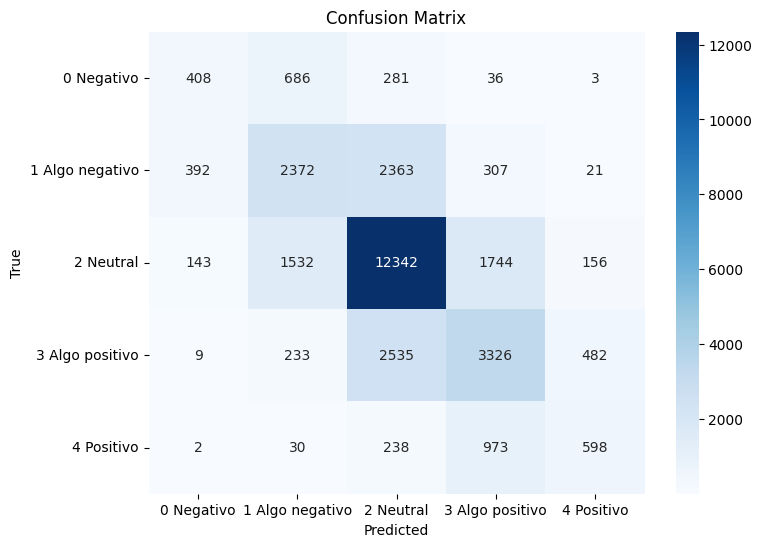

Accuracy: 0.6102140202486224
Precision: 0.5970851069548073
Recall: 0.6102140202486224
F1-Score: 0.6007873011029297

Entrenando y evaluando el modelo para Frases originales - BoW Frecuencia...

                 precision    recall  f1-score   support

     0 Negativo       0.43      0.29      0.35      1414
1 Algo negativo       0.49      0.44      0.46      5455
      2 Neutral       0.70      0.77      0.73     15917
3 Algo positivo       0.52      0.51      0.51      6585
     4 Positivo       0.47      0.33      0.39      1841

       accuracy                           0.61     31212
      macro avg       0.52      0.47      0.49     31212
   weighted avg       0.60      0.61      0.60     31212



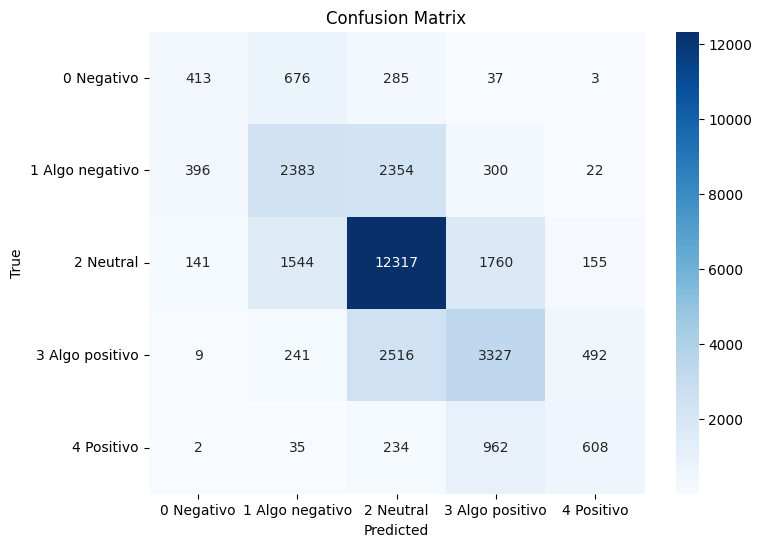

Accuracy: 0.6102780981673716
Precision: 0.5975157723031994
Recall: 0.6102780981673716
F1-Score: 0.6011973298012311

Procesando Frases originales en minúsculas...


Entrenando y evaluando el modelo para Frases originales en minúsculas - BoW Binario...

                 precision    recall  f1-score   support

     0 Negativo       0.43      0.29      0.34      1414
1 Algo negativo       0.49      0.43      0.46      5455
      2 Neutral       0.69      0.78      0.73     15917
3 Algo positivo       0.52      0.51      0.51      6585
     4 Positivo       0.47      0.32      0.39      1841

       accuracy                           0.61     31212
      macro avg       0.52      0.47      0.49     31212
   weighted avg       0.60      0.61      0.60     31212



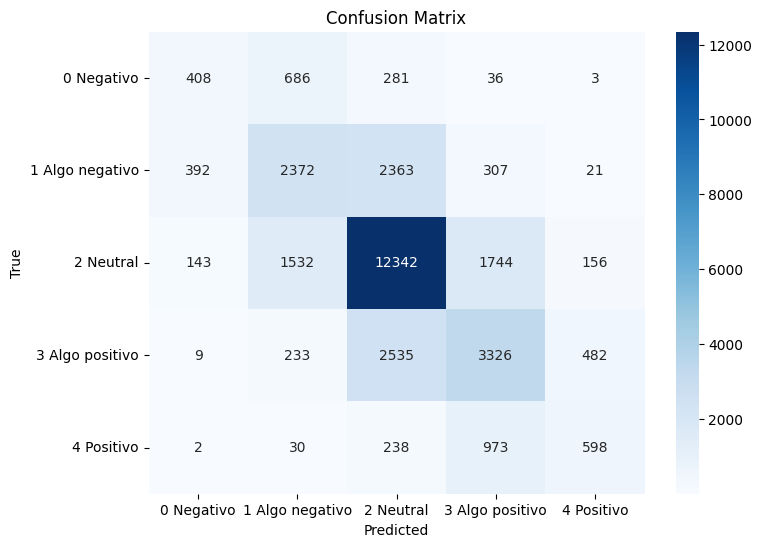

Accuracy: 0.6102140202486224
Precision: 0.5970851069548073
Recall: 0.6102140202486224
F1-Score: 0.6007873011029297

Entrenando y evaluando el modelo para Frases originales en minúsculas - BoW Frecuencia...

                 precision    recall  f1-score   support

     0 Negativo       0.43      0.29      0.35      1414
1 Algo negativo       0.49      0.44      0.46      5455
      2 Neutral       0.70      0.77      0.73     15917
3 Algo positivo       0.52      0.51      0.51      6585
     4 Positivo       0.47      0.33      0.39      1841

       accuracy                           0.61     31212
      macro avg       0.52      0.47      0.49     31212
   weighted avg       0.60      0.61      0.60     31212



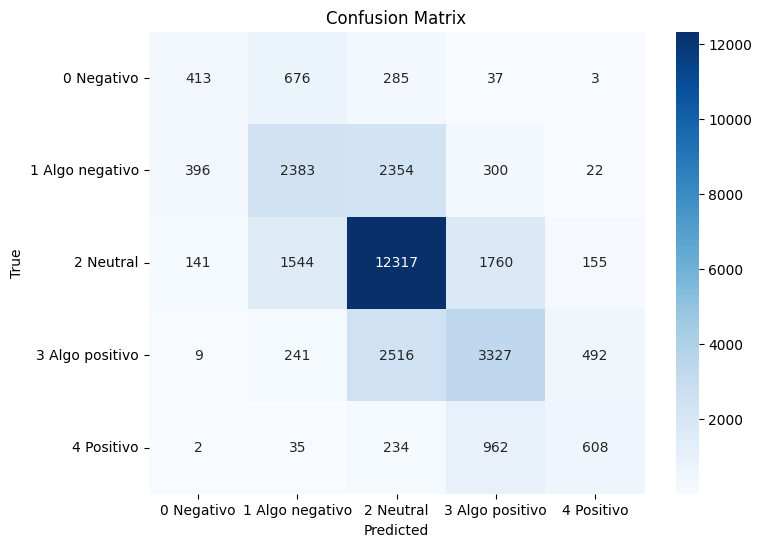

Accuracy: 0.6102780981673716
Precision: 0.5975157723031994
Recall: 0.6102780981673716
F1-Score: 0.6011973298012311

Procesando Frases originales con stemming...


Entrenando y evaluando el modelo para Frases originales con stemming - BoW Binario...

                 precision    recall  f1-score   support

     0 Negativo       0.45      0.27      0.34      1414
1 Algo negativo       0.50      0.42      0.45      5455
      2 Neutral       0.68      0.80      0.74     15917
3 Algo positivo       0.53      0.48      0.50      6585
     4 Positivo       0.49      0.30      0.37      1841

       accuracy                           0.61     31212
      macro avg       0.53      0.45      0.48     31212
   weighted avg       0.60      0.61      0.60     31212



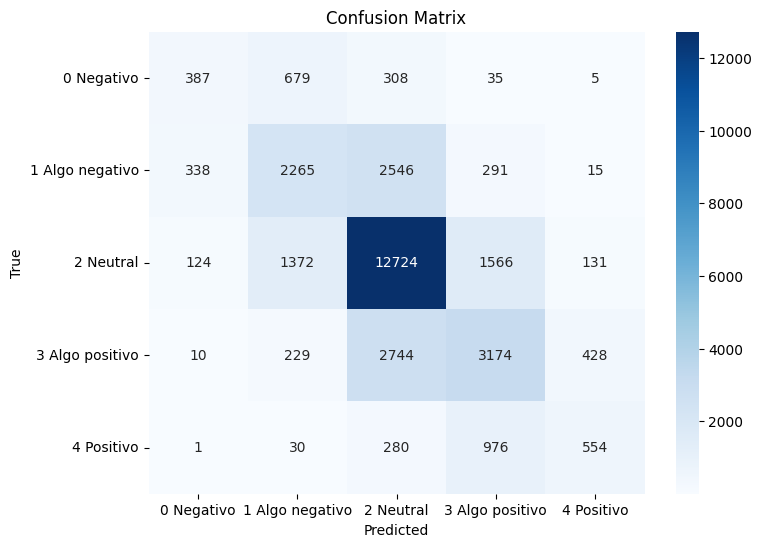

Accuracy: 0.6120722798923491
Precision: 0.5954068233938847
Recall: 0.6120722798923491
F1-Score: 0.5983490613875538

Entrenando y evaluando el modelo para Frases originales con stemming - BoW Frecuencia...

                 precision    recall  f1-score   support

     0 Negativo       0.45      0.28      0.35      1414
1 Algo negativo       0.50      0.42      0.45      5455
      2 Neutral       0.69      0.80      0.74     15917
3 Algo positivo       0.52      0.48      0.50      6585
     4 Positivo       0.48      0.31      0.37      1841

       accuracy                           0.61     31212
      macro avg       0.53      0.46      0.48     31212
   weighted avg       0.60      0.61      0.60     31212



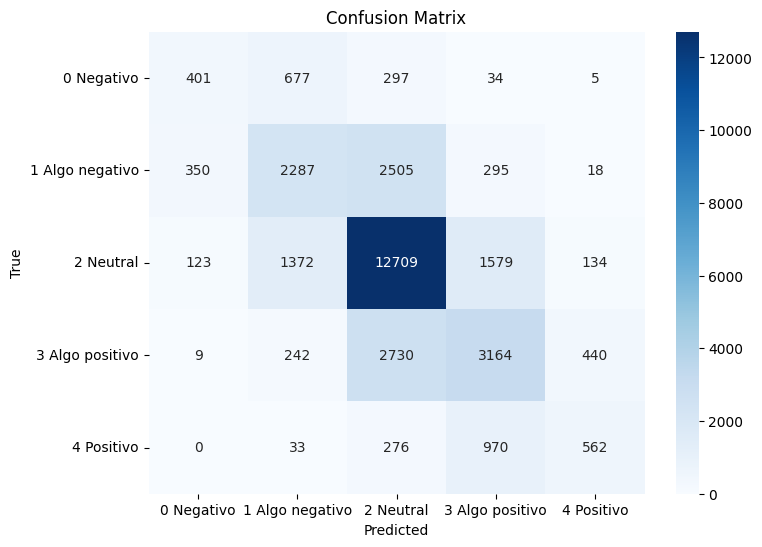

Accuracy: 0.6126810201204664
Precision: 0.5963514882332789
Recall: 0.6126810201204664
F1-Score: 0.5995022561855173

Procesando Frases originales con lemmatization...


Entrenando y evaluando el modelo para Frases originales con lemmatization - BoW Binario...

                 precision    recall  f1-score   support

     0 Negativo       0.44      0.28      0.34      1414
1 Algo negativo       0.49      0.42      0.45      5455
      2 Neutral       0.69      0.79      0.74     15917
3 Algo positivo       0.53      0.50      0.51      6585
     4 Positivo       0.48      0.33      0.39      1841

       accuracy                           0.61     31212
      macro avg       0.53      0.46      0.49     31212
   weighted avg       0.60      0.61      0.60     31212



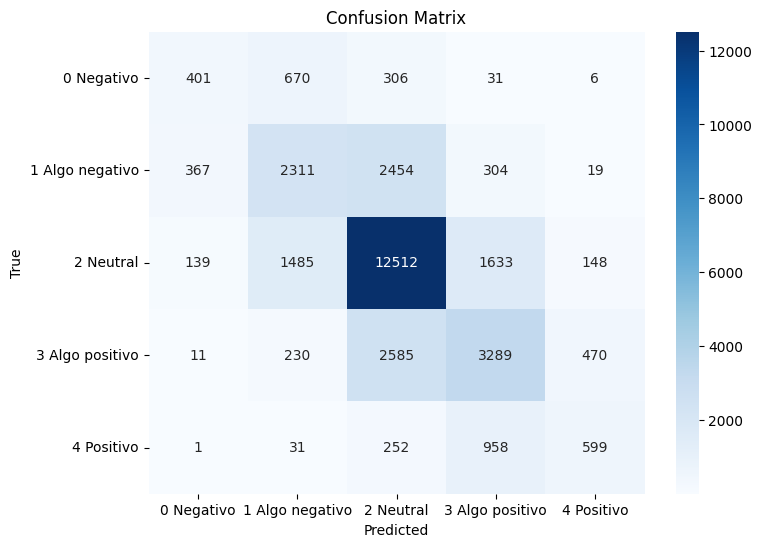

Accuracy: 0.6123285915673459
Precision: 0.5976575484468858
Recall: 0.6123285915673459
F1-Score: 0.6012984910501635

Entrenando y evaluando el modelo para Frases originales con lemmatization - BoW Frecuencia...

                 precision    recall  f1-score   support

     0 Negativo       0.44      0.29      0.35      1414
1 Algo negativo       0.49      0.42      0.45      5455
      2 Neutral       0.69      0.78      0.73     15917
3 Algo positivo       0.53      0.50      0.51      6585
     4 Positivo       0.48      0.33      0.39      1841

       accuracy                           0.61     31212
      macro avg       0.52      0.46      0.49     31212
   weighted avg       0.60      0.61      0.60     31212



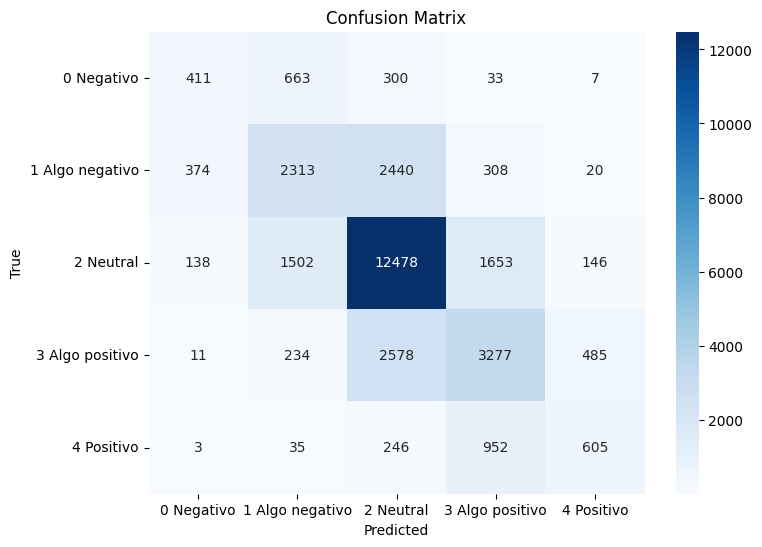

Accuracy: 0.6114315007048571
Precision: 0.5970792286387729
Recall: 0.6114315007048571
F1-Score: 0.6008063490064125

Procesando Frases sin stop words...


Entrenando y evaluando el modelo para Frases sin stop words - BoW Binario...

                 precision    recall  f1-score   support

     0 Negativo       0.38      0.25      0.30      1243
1 Algo negativo       0.43      0.40      0.41      4544
      2 Neutral       0.63      0.69      0.66     11240
3 Algo positivo       0.47      0.49      0.48      5409
     4 Positivo       0.46      0.28      0.35      1603

       accuracy                           0.54     24039
      macro avg       0.47      0.42      0.44     24039
   weighted avg       0.53      0.54      0.53     24039



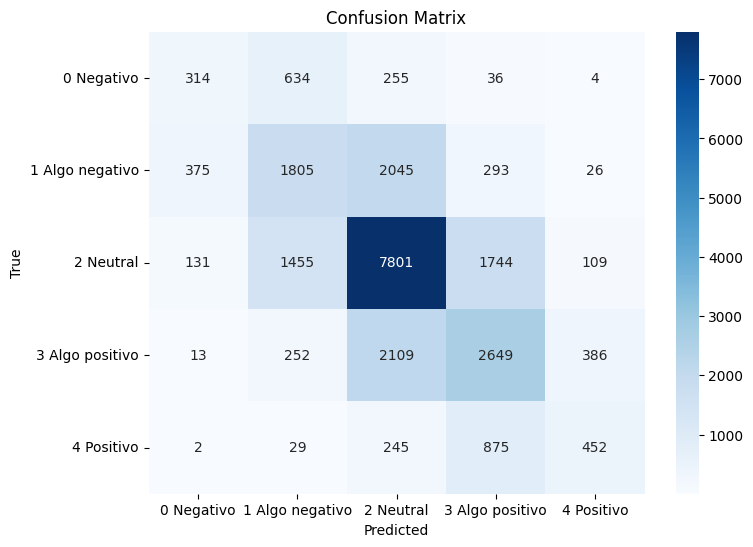

Accuracy: 0.5416614667831441
Precision: 0.5313697413808257
Recall: 0.5416614667831441
F1-Score: 0.5334437690038908

Entrenando y evaluando el modelo para Frases sin stop words - BoW Frecuencia...

                 precision    recall  f1-score   support

     0 Negativo       0.38      0.26      0.30      1243
1 Algo negativo       0.43      0.40      0.41      4544
      2 Neutral       0.63      0.69      0.66     11240
3 Algo positivo       0.47      0.49      0.48      5409
     4 Positivo       0.46      0.28      0.35      1603

       accuracy                           0.54     24039
      macro avg       0.47      0.42      0.44     24039
   weighted avg       0.53      0.54      0.53     24039



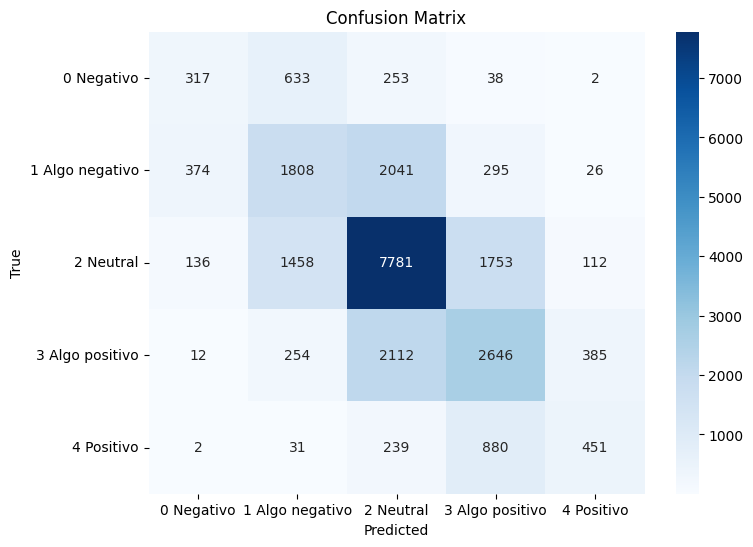

Accuracy: 0.5409126835558884
Precision: 0.5308644753913421
Recall: 0.5409126835558884
F1-Score: 0.532871297706742

Procesando Frases sin stop words con stemming...


Entrenando y evaluando el modelo para Frases sin stop words con stemming - BoW Binario...

                 precision    recall  f1-score   support

     0 Negativo       0.38      0.23      0.29      1243
1 Algo negativo       0.45      0.38      0.41      4544
      2 Neutral       0.62      0.73      0.67     11240
3 Algo positivo       0.48      0.47      0.47      5409
     4 Positivo       0.47      0.26      0.33      1603

       accuracy                           0.55     24039
      macro avg       0.48      0.41      0.43     24039
   weighted avg       0.53      0.55      0.53     24039



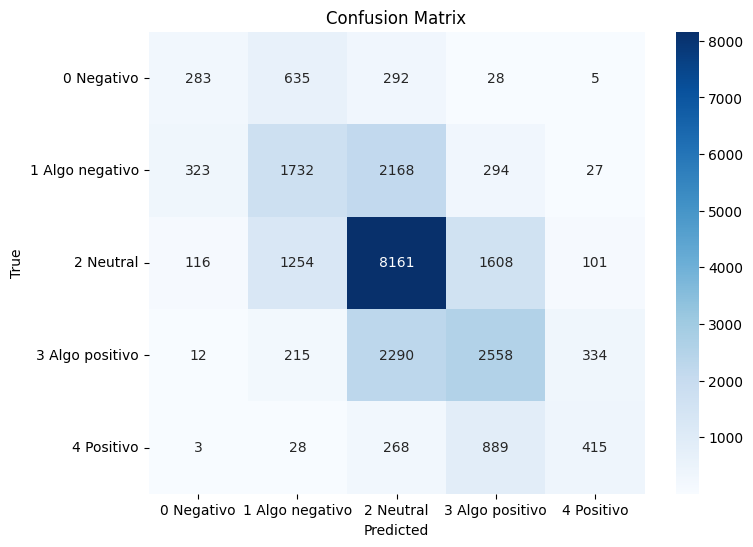

Accuracy: 0.5469861475102957
Precision: 0.5325454281831603
Recall: 0.5469861475102957
F1-Score: 0.5341889668077303

Entrenando y evaluando el modelo para Frases sin stop words con stemming - BoW Frecuencia...

                 precision    recall  f1-score   support

     0 Negativo       0.39      0.23      0.29      1243
1 Algo negativo       0.45      0.38      0.41      4544
      2 Neutral       0.62      0.72      0.67     11240
3 Algo positivo       0.47      0.47      0.47      5409
     4 Positivo       0.47      0.26      0.33      1603

       accuracy                           0.55     24039
      macro avg       0.48      0.41      0.44     24039
   weighted avg       0.53      0.55      0.53     24039



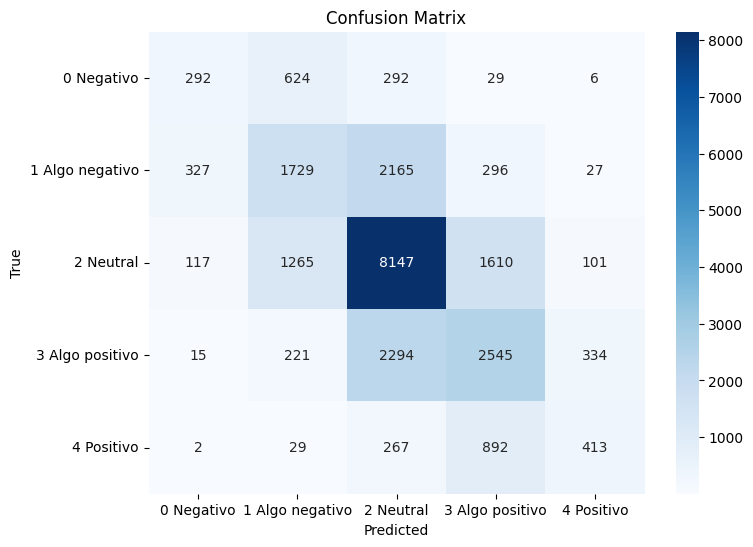

Accuracy: 0.5460293689421357
Precision: 0.5317573578193422
Recall: 0.5460293689421357
F1-Score: 0.5334162000911279

Procesando Frases sin stop words con lemmatization...


Entrenando y evaluando el modelo para Frases sin stop words con lemmatization - BoW Binario...

                 precision    recall  f1-score   support

     0 Negativo       0.37      0.23      0.29      1243
1 Algo negativo       0.43      0.39      0.41      4544
      2 Neutral       0.62      0.71      0.66     11240
3 Algo positivo       0.48      0.48      0.48      5409
     4 Positivo       0.46      0.27      0.34      1603

       accuracy                           0.54     24039
      macro avg       0.47      0.42      0.44     24039
   weighted avg       0.53      0.54      0.53     24039



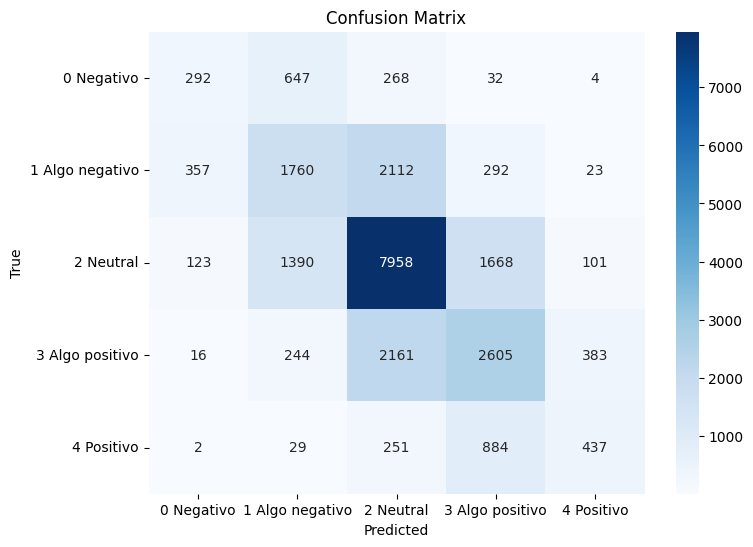

Accuracy: 0.5429510378967511
Precision: 0.5303735474054302
Recall: 0.5429510378967511
F1-Score: 0.5328006059207268

Entrenando y evaluando el modelo para Frases sin stop words con lemmatization - BoW Frecuencia...

                 precision    recall  f1-score   support

     0 Negativo       0.38      0.24      0.29      1243
1 Algo negativo       0.43      0.39      0.41      4544
      2 Neutral       0.62      0.71      0.66     11240
3 Algo positivo       0.47      0.48      0.48      5409
     4 Positivo       0.46      0.27      0.34      1603

       accuracy                           0.54     24039
      macro avg       0.47      0.42      0.44     24039
   weighted avg       0.53      0.54      0.53     24039



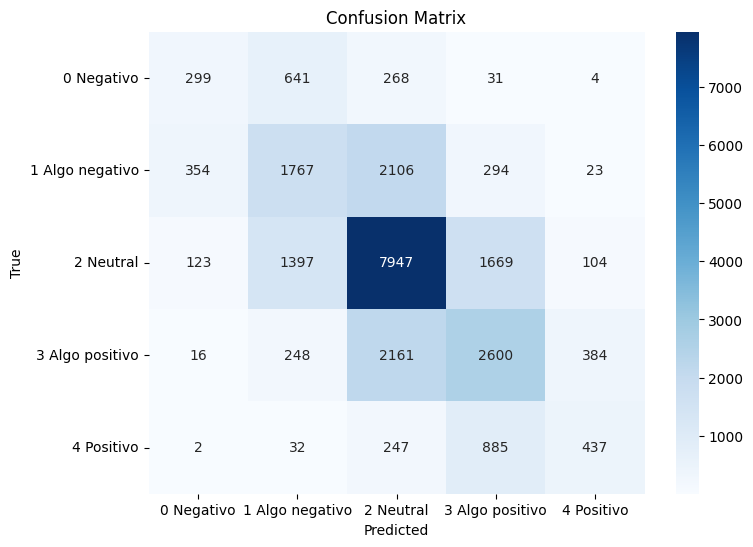

Accuracy: 0.5428678397603893
Precision: 0.5305388376547625
Recall: 0.5428678397603893
F1-Score: 0.5329191951171645


In [107]:
from sklearn.feature_extraction.text import CountVectorizer

# Definir las columnas y sus respectivos tipo_data
columns_to_process = {
    'Frases originales': ('df', 'Phrase'),
    'Frases originales en minúsculas': ('df', 'lower_text'),
    'Frases originales con stemming': ('df', 'Phrase_Stemmed'),
    'Frases originales con lemmatization': ('df', 'Phrase_Lemmatized'),
    'Frases sin stop words': ('No_Stopwords', 'Phrase_No_Stopwords'),
    'Frases sin stop words con stemming': ('No_Stopwords', 'Phrase_Stemmed'),
    'Frases sin stop words con lemmatization': ('No_Stopwords', 'Phrase_Lemmatized')
}

# Diccionarios para almacenar los resultados
binary_vectors = {}
frequency_vectors = {}
resultados = []

# Iterar sobre las columnas y aplicar CountVectorizer
for tipo_data, (dataframe, column) in columns_to_process.items():
    print(f"\nProcesando {tipo_data}...\n")

    # Crear el vectorizador binario (Bag of Words binario)
    vectorizer_binary = CountVectorizer(binary=True)
    if dataframe == 'df':
        X_binary = vectorizer_binary.fit_transform(df[column])
        y = df['Sentiment']
    else:
        X_binary = vectorizer_binary.fit_transform(No_Stopwords[column])
        y = No_Stopwords['Sentiment']

    # Guardar los resultados en el diccionario utilizando tipo_data como clave
    binary_vectors[tipo_data] = (X_binary, y)

    # Entrenar y evaluar el modelo
    print(f"\nEntrenando y evaluando el modelo para {tipo_data} - BoW Binario...\n")
    metricas = train_and_evaluate_model(tipo_data + ' - BoW Binario', X_binary, y)
    resultados.append(metricas)

    # Crear el vectorizador basado en frecuencia (Bag of Words de frecuencias)
    vectorizer_frequency = CountVectorizer(binary=False)
    if dataframe == 'df':
        X_frequency = vectorizer_frequency.fit_transform(df[column])
        y = df['Sentiment']
    else:
        X_frequency = vectorizer_frequency.fit_transform(No_Stopwords[column])
        y = No_Stopwords['Sentiment']

    # Guardar los resultados en el diccionario utilizando tipo_data como clave
    frequency_vectors[tipo_data] = (X_frequency, y)

    # Entrenar y evaluar el modelo
    print(f"\nEntrenando y evaluando el modelo para {tipo_data} - BoW Frecuencia...\n")
    metricas = train_and_evaluate_model(tipo_data + ' - BoW Frecuencia', X_frequency, y)
    resultados.append(metricas)

### 7) How does these techniques affect your models?

In [108]:
# Configurar pandas para mostrar el texto completo de las columnas
pd.set_option('display.max_colwidth', None)

# Crear un DataFrame a partir de los resultados
resultados_df = pd.DataFrame(resultados)
resultados_df[['Data', 'Train Registros', 'Test Registros', 'Accuracy', 'Precision', 'Recall', 'F1-Score']]

,Data,Train Registros,Test Registros,Accuracy,Precision,Recall,F1-Score
0,Frases originales - BoW Binario,124848,31212,0.610214,0.597085,0.610214,0.600787
1,Frases originales - BoW Frecuencia,124848,31212,0.610278,0.597516,0.610278,0.601197
2,Frases originales en minúsculas - BoW Binario,124848,31212,0.610214,0.597085,0.610214,0.600787
3,Frases originales en minúsculas - BoW Frecuencia,124848,31212,0.610278,0.597516,0.610278,0.601197
4,Frases originales con stemming - BoW Binario,124848,31212,0.612072,0.595407,0.612072,0.598349
5,Frases originales con stemming - BoW Frecuencia,124848,31212,0.612681,0.596351,0.612681,0.599502
6,Frases originales con lemmatization - BoW Binario,124848,31212,0.612329,0.597658,0.612329,0.601298
7,Frases originales con lemmatization - BoW Frecuencia,124848,31212,0.611432,0.597079,0.611432,0.600806
8,Frases sin stop words - BoW Binario,96152,24039,0.541661,0.531370,0.541661,0.533444
9,Frases sin stop words - BoW Frecuencia,96152,24039,0.540913,0.530864,0.540913,0.532871


In [109]:
# Ordenar por 'F1-Score' de manera descendente
resultados_df_sorted = resultados_df.sort_values(by='F1-Score', ascending=False)
resultados_df_sorted[['Data', 'Train Registros', 'Test Registros', 'Accuracy', 'Precision', 'Recall', 'F1-Score']]

,Data,Train Registros,Test Registros,Accuracy,Precision,Recall,F1-Score
6,Frases originales con lemmatization - BoW Binario,124848,31212,0.612329,0.597658,0.612329,0.601298
1,Frases originales - BoW Frecuencia,124848,31212,0.610278,0.597516,0.610278,0.601197
3,Frases originales en minúsculas - BoW Frecuencia,124848,31212,0.610278,0.597516,0.610278,0.601197
7,Frases originales con lemmatization - BoW Frecuencia,124848,31212,0.611432,0.597079,0.611432,0.600806
0,Frases originales - BoW Binario,124848,31212,0.610214,0.597085,0.610214,0.600787
2,Frases originales en minúsculas - BoW Binario,124848,31212,0.610214,0.597085,0.610214,0.600787
5,Frases originales con stemming - BoW Frecuencia,124848,31212,0.612681,0.596351,0.612681,0.599502
4,Frases originales con stemming - BoW Binario,124848,31212,0.612072,0.595407,0.612072,0.598349
10,Frases sin stop words con stemming - BoW Binario,96152,24039,0.546986,0.532545,0.546986,0.534189
8,Frases sin stop words - BoW Binario,96152,24039,0.541661,0.531370,0.541661,0.533444
